<a href="https://colab.research.google.com/github/hahajjjun/Machine_Learning_Toy_Projects/blob/main/Project_6_TGILAB_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python Implementation and Visualization of PCA process

In [2]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [41]:
x = sorted(random.sample(range(100),20))
y = sorted(random.sample(range(100),20), reverse = True)

In [44]:
datas = [(x[i],y[i]) for i in range(len(x))]

In [54]:
data_matrix = np.array(datas) - np.array(datas).mean(0) # broadcasting

In [55]:
data_matrix.mean(0)

array([7.10542736e-16, 0.00000000e+00])

In [64]:
cov_matrix = data_matrix.transpose().dot(data_matrix) / data_matrix.shape[0]

In [65]:
from numpy.linalg import eig
eval, evec = eig(cov_matrix)

In [68]:
def sortbyeigval(eigenValues, eigenVectors): # 두 차례 Eigenvalue Decomposition했을 때 eigenvalue 크기 순서대로 정렬하고 부호도 통일해야 함!
  idx = np.argsort(eigenValues)[::-1]
  eigenValues = eigenValues[idx]
  eigenVectors = eigenVectors[:,idx]
  return (eigenValues, eigenVectors)

In [69]:
eval, evec = sortbyeigval(eval, evec)

In [72]:
PC1, PC2 = evec[0], evec[1]
x_m, y_m = sum(x)/len(x), sum(y)/len(y)

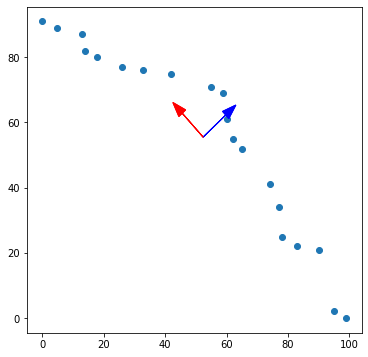

In [82]:
fig, ax = plt.subplots(1, figsize = (6,6))
ax.scatter(x,y)
ax.add_patch(ax.arrow(x_m,y_m, PC1[0]*10, PC1[1]*10, color = "b", shape = "full", head_width = 3))
ax.add_patch(ax.arrow(x_m,y_m, PC2[0]*10, PC2[1]*10, color = "r", shape = "full", head_width = 3))
plt.show()